<a href="https://colab.research.google.com/github/rokmr/Kick-Start-AI/blob/main/src/BiasVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PolynomialRegressor:
    def __init__(self, degree=1):
        self.degree = degree
        self.weights = None

    def _create_polynomial_features(self, X):
        X_poly = np.ones((len(X), self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X ** i
        return X_poly

    def fit(self, X, y):
        X_poly = self._create_polynomial_features(X)
        X_T = X_poly.T
        self.weights = np.linalg.inv(X_T.dot(X_poly)).dot(X_T).dot(y)

    def predict(self, X):
        X_poly = self._create_polynomial_features(X)
        return X_poly.dot(self.weights)

In [3]:
def generate_data(n_samples=30, noise_std=0.1):
    """Generate synthetic sinusoidal data with noise"""
    X = np.linspace(0, 6, n_samples)
    y = np.sin(X) + np.random.normal(0, noise_std, n_samples)
    return X, y

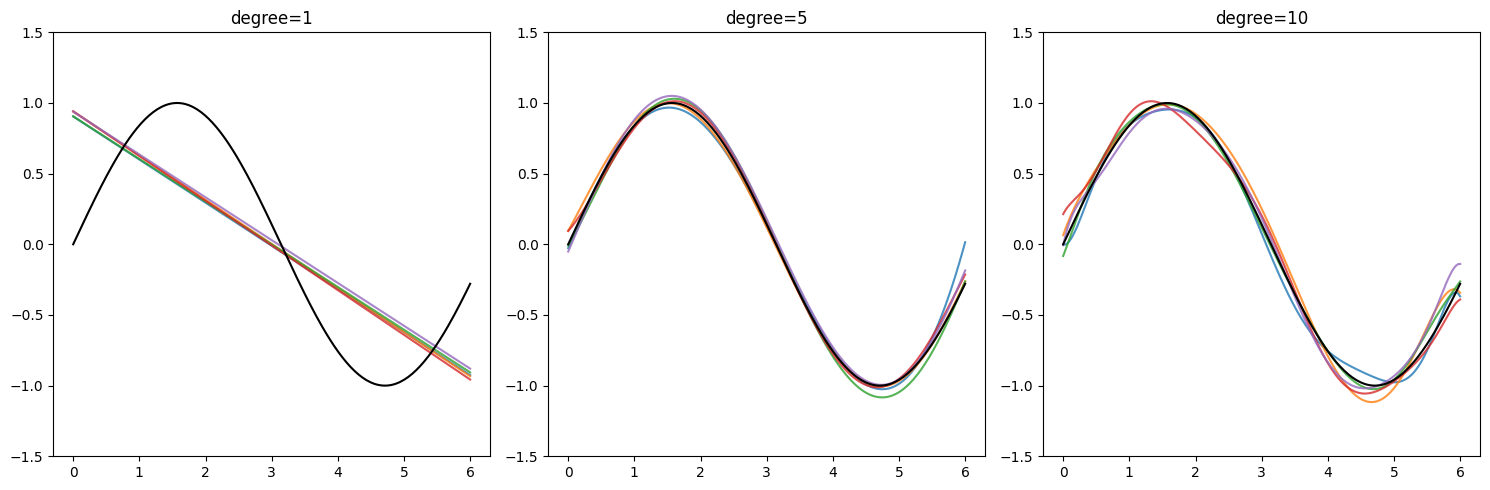

In [4]:
np.random.seed(42)
n_samples=30
noise_std=0.2
X = np.linspace(0, 6, n_samples)
y = np.sin(X) + np.random.normal(0, noise_std, n_samples)

degrees = [1, 5, 10]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()
X_test = np.linspace(0, 6, 200)
y_true = np.sin(X_test)

for i, degree in enumerate(degrees):
  for _ in range(5):
    X, y = generate_data(n_samples=30)
    model = PolynomialRegressor(degree=degree)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    ax = axes[i]
    ax.plot(X_test, y_pred, alpha=0.8)
    ax.set_title(f'degree={degree}')
  ax.plot(X_test, y_true, color='black')
  ax.set_ylim(-1.5, 1.5)
  plt.tight_layout()